In [14]:
import numpy as np
import math
from numpy.polynomial import chebyshev
from math import pi
from scipy.interpolate import barycentric_interpolate 
import matplotlib.pyplot as plt
from scipy.linalg import norm
import time

#Funciones de las que hay que calcular la interpolación
def runge(x):
    return 1/(1+25*(x**2))

#función seno vectorizada
sin_vec=np.vectorize(math.sin) 

def exponencial(x):
    return math.exp(-20*(x**2))

#función exponencial vectorizada
exp_vec=np.vectorize(exponencial)

#Nodos de Chebyshev
# Tomamos el polinomio T_11(x).  Hemos de poner los coeficientes en orden ascendente, es decir,  
# (1, 0, 3) devolvería 1*T_0(x) + 2*T_1(x) + 3*T_2(x).
coefs_Cheby_11 = [0]*11+[1]
coefs_Cheby_21 = [0]*21+[1]

######## Seno
abscisas_sin = np.linspace(-pi, pi, 100)
nodos_sin_11 = np.linspace(-pi,pi,11) 
nodos_sin_21 = np.linspace(-pi,pi,21) 
T11_sin = chebyshev.Chebyshev(coefs_Cheby_11, [-pi, pi])
nodos_cheby_sin_11 = T11_sin.roots()
T21_sin = chebyshev.Chebyshev(coefs_Cheby_21, [-pi, pi])
nodos_cheby_sin_21 = T21_sin.roots()

######## Runge
abscisas_runge = np.linspace(-1, 1, 100)
nodos_runge_11 = np.linspace(-1,1,11) 
nodos_runge_21 = np.linspace(-1,1,21) 
T11_runge = chebyshev.Chebyshev(coefs_Cheby_11, [-1, 1])
nodos_cheby_runge_11 = T11_runge.roots()
T21_runge = chebyshev.Chebyshev(coefs_Cheby_21, [-1, 1])
nodos_cheby_runge_21 = T21_runge.roots()

######## Gauss
abscisas_gauss = np.linspace(-1, 1, 100)
nodos_gauss_11 = np.linspace(-1,1,11) 
nodos_gauss_21 = np.linspace(-1,1,21) 
T11_gauss = chebyshev.Chebyshev(coefs_Cheby_11, [-1, 1])
nodos_cheby_gauss_11 = T11_gauss.roots()
T21_gauss = chebyshev.Chebyshev(coefs_Cheby_21, [-1, 1])
nodos_cheby_gauss_21 = T21_gauss.roots()
# Para tener el estilo correcto
from matplotlib import style
style.use('default')

# Tarea 1-Interpolación polinómica: Interpolación baricéntrica

TBD

In [48]:
def inter_bar(nodos,funcion,intervalo):
    """ Esta función hace la interpolación baricéntrica, crea su plot y calcula el error y tiempo
        que se tarda en hacer la interpolación. 
    
    Args:
        nodos : Lista de nodos para interpolar 
        funcion :  Funcion que se quiere interpolar.
        intervalo : Lista de puntos donde se evaluará el polinomio baricentrico tras ser calculado
        
    Returns:
        pol: Devuelve el valor de los puntos del intervalo evaluados con el polinomio interpolador.
                Recordemos que barycentric_interpolate no nos devuelve los coeficientes del polinomio, 
                sino que evalua el polinomio en el intervalo que le damos.
        fig: Devuelve el plot.
        tiempo_ejecucion: Tiempo que tarda en ejecutarse la interpolacion
        error: Error de la interpolacion respecto al intervalo original.
        
        
    """
    # Recordemos que barycentric_interpolate no nos devuelve los coeficientes del polinomio, 
    # sino que evalua el polinomio en el intervalo que le damos.
    abscisas = funcion(nodos)
    inicio =time.perf_counter()
    pol = barycentric_interpolate(nodos, abscisas, intervalo)
    fin = time.perf_counter()
    
    print("El polinomio interpolador obtenido toma los valores:",pol)
    print("Tiempo de ejecución de la interpolación baricéntrica es:", fin-inicio,"s") 
    error=norm(pol-funcion(intervalo))
    print("Error absoluto:",error)
    # Creo una figura
    fig = plt.figure()
    plt.plot(nodos, funcion(nodos), "ko", figure=fig)
    plt.xlabel('x', figure=fig)
    plt.plot(intervalo, pol,'c',label='polinomio interpolador', figure=fig)
    plt.plot(intervalo,funcion(intervalo),'g:',label='función', figure=fig)
    plt.title("Interpolación baricéntrica", figure=fig)
    plt.legend()
    plt.close(fig)
    
    return pol, fig

In [54]:
poli = barycentric_interpolate(nodos_sin_11,sin_vec(nodos_sin_11),abscisas_sin)
poli


array([-1.22464680e-16, -6.33905483e-02, -1.26544011e-01, -1.89199690e-01,
       -2.51100583e-01, -3.11994065e-01, -3.71632616e-01, -4.29774571e-01,
       -4.86184895e-01, -5.40635971e-01, -5.92908382e-01, -6.42791699e-01,
       -6.90085240e-01, -7.34598828e-01, -7.76153504e-01, -8.14582224e-01,
       -8.49730502e-01, -8.81457029e-01, -9.09634229e-01, -9.34148773e-01,
       -9.54902038e-01, -9.71810507e-01, -9.84806113e-01, -9.93836518e-01,
       -9.98865332e-01, -9.99872261e-01, -9.96853204e-01, -9.89820264e-01,
       -9.78801711e-01, -9.63841868e-01, -9.45000935e-01, -9.22354750e-01,
       -8.95994483e-01, -8.66026267e-01, -8.32570773e-01, -7.95762722e-01,
       -7.55750340e-01, -7.12694761e-01, -6.66769374e-01, -6.18159126e-01,
       -5.67059774e-01, -5.13677096e-01, -4.58226061e-01, -4.00929962e-01,
       -3.42019517e-01, -2.81731939e-01, -2.20309981e-01, -1.58000962e-01,
       -9.50557664e-02, -3.17278384e-02,  3.17278384e-02,  9.50557664e-02,
        1.58000962e-01,  

Los resultados que se han obtenido al aproximar la función seno mediante la interpolación baricéntrica son muy similares en todos los casos, pues aproximan de forma casi perfecta la función seno en el intervalo [-$\pi,\pi$]. Sin embargo, hay que destacar dado el error obtenido que en el caso de 11 nodos el error cometido es mayor que con 21 nodos. Ademas, el error que se comete con los nodos equiespaciados es mayor que el que se produce con los nodos de Chebyshev. Veamos que ocurre ahora con la función Runge

El polinomio interpolador obtenido toma los valores: [ 0.03846154  1.23882662  1.81107739  1.95879654  1.83738939  1.56275898
  1.21879019  0.86376493  0.53582149  0.2575625   0.03990835 -0.11471511
 -0.20977291 -0.2525265  -0.25238023 -0.21960672 -0.16439487 -0.09616966
 -0.0231383   0.04797809  0.1120635   0.16560857  0.20662278  0.2344815
  0.24972893  0.2538546   0.24905844  0.23801662  0.22365803  0.20895915
  0.196763    0.18962611  0.18969608  0.19862073  0.21748867  0.24680044
  0.28646802  0.33584024  0.3937509   0.45858605  0.52836653  0.60084191
  0.67359161  0.74412929  0.81000674  0.86891342  0.91876859  0.95780273
  0.98462604  0.99828154  0.99828154  0.98462604  0.95780273  0.91876859
  0.86891342  0.81000674  0.74412929  0.67359161  0.60084191  0.52836653
  0.45858605  0.3937509   0.33584024  0.28646802  0.24680044  0.21748867
  0.19862073  0.18969608  0.18962611  0.196763    0.20895915  0.22365803
  0.23801662  0.24905844  0.2538546   0.24972893  0.2344815   0.20662278

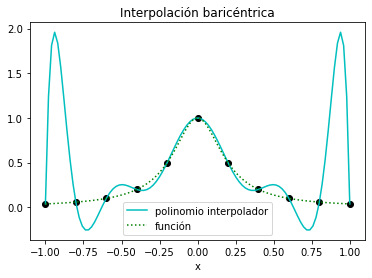

El polinomio interpolador obtenido toma los valores: [ 3.84615385e-02 -5.83666905e+01 -5.04616680e+01 -2.80057660e+01
 -9.76075618e+00  3.77348512e-01  4.03341080e+00  3.99922049e+00
  2.54295791e+00  1.01396877e+00 -1.70741097e-02 -4.71374137e-01
 -5.01831452e-01 -3.16136330e-01 -8.33949683e-02  9.72957438e-02
  1.91589693e-01  2.08726958e-01  1.78276097e-01  1.32065116e-01
  9.36870076e-02  7.49313724e-02  7.70562632e-02  9.45221265e-02
  1.19199501e-01  1.43748932e-01  1.63582103e-01  1.77385365e-01
  1.86551808e-01  1.94024161e-01  2.03038219e-01  2.16134190e-01
  2.34631900e-01  2.58596529e-01  2.87189786e-01  3.19225609e-01
  3.53732202e-01  3.90354340e-01  4.29494622e-01  4.72170457e-01
  5.19636520e-01  5.72876201e-01  6.32091663e-01  6.96318399e-01
  7.63260315e-01  8.29393253e-01  8.90329061e-01  9.41379784e-01
  9.78222006e-01  9.97541526e-01  9.97541526e-01  9.78222006e-01
  9.41379784e-01  8.90329061e-01  8.29393253e-01  7.63260315e-01
  6.96318399e-01  6.32091663e-01  5.7

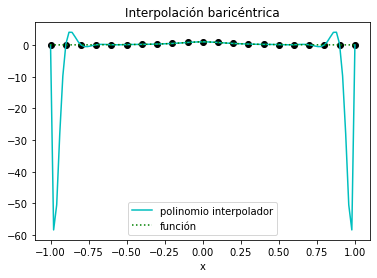

El polinomio interpolador obtenido toma los valores: [-0.00532688  0.06679044  0.08711228  0.07860062  0.057358    0.03408351
  0.01530593  0.00441835  0.00253681  0.00920393  0.02295645  0.04177453
  0.06342862  0.08573872  0.10675922  0.12490135  0.13900412  0.14836329
  0.15272715  0.15226661  0.14752635  0.13936284  0.12887422  0.1173264
  0.10607887  0.09651317  0.08996654  0.08767233  0.09070882  0.09995717
  0.11606919  0.13944501  0.17022069  0.20826539  0.25318743  0.30434869
  0.36088626  0.42174043  0.48568793  0.55137926  0.61737879  0.68220674
  0.74438153  0.80246166  0.85508579  0.90101025  0.93914297  0.96857297
  0.98859486  0.99872766  0.99872766  0.98859486  0.96857297  0.93914297
  0.90101025  0.85508579  0.80246166  0.74438153  0.68220674  0.61737879
  0.55137926  0.48568793  0.42174043  0.36088626  0.30434869  0.25318743
  0.20826539  0.17022069  0.13944501  0.11606919  0.09995717  0.09070882
  0.08767233  0.08996654  0.09651317  0.10607887  0.1173264   0.12887422

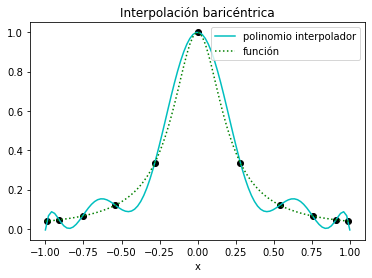

El polinomio interpolador obtenido toma los valores: [0.04439133 0.03718769 0.04752703 0.04640222 0.04134457 0.04065293
 0.04576602 0.05353775 0.06007966 0.06318443 0.06292399 0.06101322
 0.05970572 0.0608054  0.06509754 0.07225751 0.08113339 0.09022597
 0.09818677 0.10419752 0.10815641 0.11065884 0.11281015 0.11593799
 0.12128209 0.12973222 0.14166519 0.15690595 0.17481111 0.19445031
 0.21484484 0.23521566 0.25519398 0.27495641 0.29526002 0.31737004
 0.34288912 0.37351235 0.41074259 0.45560648 0.50841149 0.56857869
 0.63457666 0.70396884 0.77357259 0.83971444 0.89855432 0.94644298
 0.98027283 0.99778277 0.99778277 0.98027283 0.94644298 0.89855432
 0.83971444 0.77357259 0.70396884 0.63457666 0.56857869 0.50841149
 0.45560648 0.41074259 0.37351235 0.34288912 0.31737004 0.29526002
 0.27495641 0.25519398 0.23521566 0.21484484 0.19445031 0.17481111
 0.15690595 0.14166519 0.12973222 0.12128209 0.11593799 0.11281015
 0.11065884 0.10815641 0.10419752 0.09818677 0.09022597 0.08113339
 0.072257

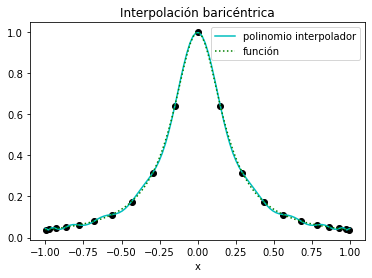

In [11]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función runge
inter_bari_runge_eq_11=inter_bar(nodos_runge_11,runge,abscisas_runge)
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función runge
inter_bari_runge_eq_21=inter_bar(nodos_runge_21,runge,abscisas_runge)
# Polinomio interpolador que se obtiene con 11 nodos de Chebyshev en la función runge
inter_bari_runge_cheby_11=inter_bar(nodos_cheby_runge_11,runge,abscisas_runge)
# Polinomio interpolador que se obtiene con 21 nodos de Chebyshev en la función runge
inter_bari_runge_cheby_21=inter_bar(nodos_cheby_runge_21,runge,abscisas_runge)

A diferencia del caso anterior al aproximar la función Runge en el intervalo [-1,1] se obtienen resultados muy opuestos. De forma que, en el caso de nodos equiespaciados a medida que se toman más nodos se va empeorando la aproximación del polinomio interpolador, lo que queda reflejado en el error absoluto cometido y en la gráfica cuyo recorrido en la función Runge es [0,1] y en el polinomio interpolado con 21 nodos equiespaciados es [-60,4.04). Por el contrario, al tomar nodos de Chebyshev el error que se comete es menor que en el caso de los nodos equiespaciados, destancándose el hecho de que el polinomio interpolador en el caso de 21 nodos aproxima mejor la función Runge.

El polinomio interpolador obtenido toma los valores: [ 2.06115362e-09  1.01467771e+00  1.49418992e+00  1.61346497e+00
  1.50563495e+00  1.26962906e+00  9.76717222e-01  6.76112030e-01
  3.99729075e-01  1.66198346e-01 -1.57878538e-02 -1.44711736e-01
 -2.23979375e-01 -2.60116432e-01 -2.61349933e-01 -2.36521241e-01
 -1.94280563e-01 -1.42518191e-01 -8.79922683e-02 -3.61171833e-02
  9.11927892e-03  4.51381429e-02  7.06754019e-02  8.56334795e-02
  9.08963274e-02  8.81237117e-02  7.95376904e-02  6.77119477e-02
  5.53725232e-02  4.52165561e-02  3.97539277e-02  4.11751471e-02
  5.12474548e-02  7.12399221e-02  1.01877291e-01  1.43321412e-01
  1.95178407e-01  2.56529077e-01  3.25979611e-01  4.01729290e-01
  4.81651671e-01  5.63385561e-01  6.44432098e-01  7.22254296e-01
  7.94375517e-01  8.58473597e-01  9.12467570e-01  9.54594299e-01
  9.83472675e-01  9.98153487e-01  9.98153487e-01  9.83472675e-01
  9.54594299e-01  9.12467570e-01  8.58473597e-01  7.94375517e-01
  7.22254296e-01  6.44432098e-01  5.6

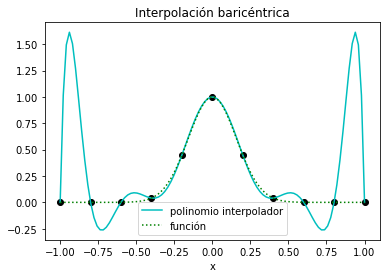

El polinomio interpolador obtenido toma los valores: [ 2.06115362e-09 -1.92581074e+00 -1.65069398e+00 -9.08342695e-01
 -3.14468165e-01  1.04801156e-02  1.25080601e-01  1.22511141e-01
  7.63037779e-02  2.89765956e-02 -2.27048978e-03 -1.56812153e-02
 -1.64065270e-02 -1.09357948e-02 -4.31847240e-03  6.42966487e-04
  3.10018331e-03  3.44257082e-03  2.58013228e-03  1.42772770e-03
  6.37746236e-04  5.40126577e-04  1.21378592e-03  2.61389782e-03
  4.69833148e-03  7.52107537e-03  1.12823406e-02  1.63401474e-02
  2.31956087e-02  3.24649934e-02  4.48481944e-02  6.10978928e-02
  8.19886300e-02  1.08281631e-01  1.40680267e-01  1.79772499e-01
  2.25959908e-01  2.79377150e-01  3.39809746e-01  4.06621251e-01
  4.78702161e-01  5.54452285e-01  6.31805502e-01  7.08301407e-01
  7.81202785e-01  8.47652027e-01  9.04854261e-01  9.50270937e-01
  9.81805388e-01  9.97961884e-01  9.97961884e-01  9.81805388e-01
  9.50270937e-01  9.04854261e-01  8.47652027e-01  7.81202785e-01
  7.08301407e-01  6.31805502e-01  5.5

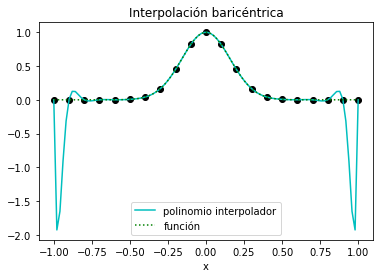

El polinomio interpolador obtenido toma los valores: [-0.05279031  0.03227092  0.0547347   0.0423651   0.01459825 -0.01568429
 -0.04065414 -0.05627703 -0.06126825 -0.05623739 -0.04299881 -0.0240265
 -0.0020336   0.02034117  0.04075655  0.05731577  0.0686509   0.07395622
  0.0729812   0.06599244  0.05371251  0.03724315  0.01797861 -0.00248547
 -0.0224433  -0.04016676 -0.05398689 -0.06236676 -0.06396414 -0.05768282
 -0.04271186 -0.01855266  0.01496625  0.05768604  0.10912542  0.16849868
  0.23474256  0.30655106  0.38241645  0.46067539  0.53955851  0.61724209
  0.69190035  0.76175696  0.82513452  0.88050068  0.92650995  0.96203999
  0.98622178  0.9984628   0.9984628   0.98622178  0.96203999  0.92650995
  0.88050068  0.82513452  0.76175696  0.69190035  0.61724209  0.53955851
  0.46067539  0.38241645  0.30655106  0.23474256  0.16849868  0.10912542
  0.05768604  0.01496625 -0.01855266 -0.04271186 -0.05768282 -0.06396414
 -0.06236676 -0.05398689 -0.04016676 -0.0224433  -0.00248547  0.01797861

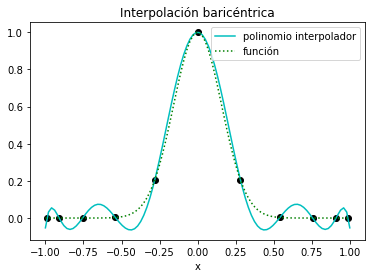

El polinomio interpolador obtenido toma los valores: [ 1.13064250e-03 -5.32752691e-04  1.10943703e-03  5.67911569e-04
 -7.15085674e-04 -1.19637464e-03 -6.33990023e-04  3.74112340e-04
  1.11618377e-03  1.20533018e-03  6.71646488e-04 -1.68847921e-04
 -9.20435839e-04 -1.28204587e-03 -1.13858546e-03 -5.64574901e-04
  2.36102485e-04  1.01962608e-03  1.58845524e-03  1.85195420e-03
  1.85168242e-03  1.75314033e-03  1.81392929e-03  2.34221273e-03
  3.65924539e-03  6.07647639e-03  9.89259255e-03  1.54101747e-02
  2.29665543e-02  3.29698377e-02  4.59293974e-02  6.24705303e-02
  8.33252362e-02  1.09294717e-01  1.41183623e-01  1.79710609e-01
  2.25403754e-01  2.78492374e-01  3.38808239e-01  4.05709178e-01
  4.78036350e-01  5.54113471e-01  6.31792169e-01  7.08543044e-01
  7.81587261e-01  8.48059233e-01  9.05187533e-01  9.50479004e-01
  9.81890300e-01  9.97971906e-01  9.97971906e-01  9.81890300e-01
  9.50479004e-01  9.05187533e-01  8.48059233e-01  7.81587261e-01
  7.08543044e-01  6.31792169e-01  5.5

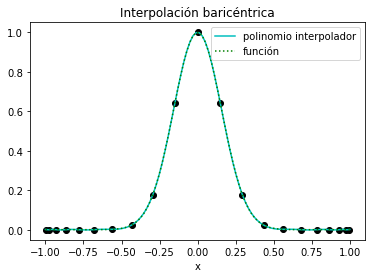

In [15]:
# Polinomio interpolador que se obtiene con 11 nodos equiespaciados en la función de Gauss
inter_bari_exp_eq_11=inter_bar(nodos_gauss_11,exp_vec,abscisas_gauss)
# Polinomio interpolador que se obtiene con 21 nodos equiespaciados en la función de Gauss
inter_bari_exp_eq_21=inter_bar(nodos_gauss_21,exp_vec,abscisas_gauss)
# Polinomio interpolador que se obtiene con 11 nodos de Chebyshev en la función de Gauss
inter_bari_exp_cheby_11=inter_bar(nodos_cheby_gauss_11,exp_vec,abscisas_gauss)
# Polinomio interpolador que se obtiene con 21 nodos de Chebyshev en la función de Gauss
inter_bari_exp_cheby_21=inter_bar(nodos_cheby_gauss_21,exp_vec,abscisas_gauss)

En último caso, al aproximar la función exponencial en el intervalo [-1,1] Ocurre algo similar al caso anterior, pero lo errores producidos no son tan grandes. De modo que, con los nodos equiespaciados se aproxima peor que con los nodos de Chevyshev, especialmente al aumentar el número de nodos. A diferencia de los nodos de Chevyshev que al aumentar en número el polinomio de interpolación baricéntrica comete un error menor. Además, se debe señalar que el tiempo de ejecución de la interpolación baricéntrica es muy pequeño en todos los casos estudiados.

# Tarea 1: Interpolación polinómica: Interpolación Lagrange

TBD

# Tarea 1: Interpolación polinómica: Interpolación Newton

TBD

# Tarea 2: Splines cúbicos

TBD